# WOC 4.0
>> ### Machine Learning
>>>> ###### IIT(ISM) Dhanabad
>>>> ###### Arushika

# K- Nearest Neighbouring  Clustering

In [ ]:
# Importing the libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import random as rd

In [ ]:
# Importing the datasets needed
df_train = pd.read_csv('emnist-letters-train.csv' , header=None)
df_test = pd.read_csv('emnist-letters-test.csv' , header =None)

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Seperating Labels and its corresponding values 

# For labels
y_train = df_train.iloc[0:10000,0:1].values
y_test = df_test.iloc[0:10000,0:1].values

# Seperating x features
X_train = df_train.iloc[0:10000,1:785].values
X_test = df_test.iloc[0:10000,1:785].values

In [53]:
# Scaling X 
X_train = (X_train)
X_train
y_train

array([[23],
       [ 7],
       [16],
       ...,
       [22],
       [24],
       [21]])

In [54]:
# Scaling X
X_test = X_test

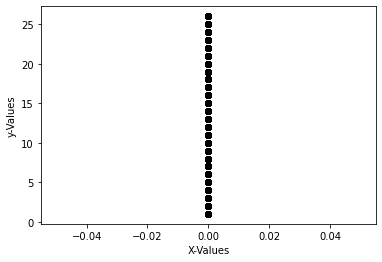

In [55]:
pp.scatter(X_train[:,0],y_train,c='black')
pp.xlabel('X-Values')
pp.ylabel('y-Values')
pp.show()

In [56]:
y_train[0]

array([23])

In [57]:
def euclidean_distance(row_1 , row_2):
  dist_sq = (row_1- row_2)**2
  element = np.sum(dist_sq,axis=1)
  dist = np.sqrt(element)
   
  return dist

X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
m,n= X_train.shape
m_test,n_test= X_test.shape
k=5
y_pred=np.zeros((m_test,1))
for i in range (m_test):
    diff=X_train-(X_test[i,:])
    diff_sqr=diff**2
    sum_diff_sqr=(np.sum(diff_sqr,axis=1))
    dist=np.sqrt(sum_diff_sqr)
    argsort=np.argsort(dist)
    argsort=argsort[:5]
    count=np.zeros((n,1))
    
    for j in argsort:
        count[y_train[j]-1]+=1
        pred=(np.argmax(count))+1
        y_pred[i]=pred
        print(y_pred[i])
            

Streaming output truncated to the last 5000 lines.
[12.]
[12.]
[12.]
[12.]
[12.]
[9.]
[9.]
[9.]
[9.]
[9.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[9.]
[12.]
[9.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[9.]
[12.]
[9.]
[9.]
[9.]
[9.]
[9.]
[12.]
[2.]
[12.]
[12.]
[12.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[9.]
[9.]
[9.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[12.]
[9.]
[9.]
[12.]
[12.]
[12.]
[12.]
[12.]
[9.]
[9.]
[9.]
[9.]
[9.]
[12.]
[12.]
[12.]
[12.]
[12.]
[3.]
[3.]
[3.]
[3.]
[3.]
[9.]
[9.]
[9.]
[9.]
[12.]
[20.]
[9.]
[2.]
[2.]
[12.]
[12.]
[12.]
[12.]
[9.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[9.]
[9.]
[9.]
[9.]
[12.]
[12.]
[10.]
[12.]
[12.]
[9.]
[9.]
[9.]
[9.]
[9.]
[12.]
[12.]
[12.]
[12.]
[12.]
[9.]
[9.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[12.]
[26.]
[3.]
[26.]
[26.]
[26.]
[12.]
[12.]
[22.]
[22.]
[22.]
[12.]
[12.]
[12.]
[12.]
[12.]


In [59]:
count=0
for i in range(y_test.size):
    
    if(y_test[i]==y_pred[i]):
         count+=1
count/m *100 

72.67